## **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/MyDrive/FYP/Implementation/data
encoded-data.csv	preprosessing-dos.csv	  UNSW-NB15_1.csv
NUSW-NB15_features.csv	selected_columns_all.csv  UNSW-NB15_2.csv
OTset.csv		SVR-predict-data.csv	  UNSW-NB15_3.csv
preprocessing.csv	testset.csv		  UNSW-NB15_4.csv


In [3]:
attack_type = 'Shellcode'

## **Load balanced training datset for DOS attacks**

Data = (x_train, y_train)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col[attack_type])

#create training dataset down sampling
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


DoS_attacks = df[df[attack_type] == 1]
Normal_Data = df[df['Label'] == 0]
frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=attack_labels, axis=1)
Y=result[[attack_type]]
X.head()

undersample = RandomUnderSampler(random_state=0)
# fit and apply the transform
X, Y = undersample.fit_resample(X,Y)


x_train,y_train  = shuffle(X[columns],Y)


X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 




array([[0.        , 0.00966635, 0.40920876, ..., 0.        , 0.00322212,
        0.7958627 ],
       [0.        , 0.01798004, 0.17980035, ..., 0.        , 0.00599335,
        0.79112155],
       [0.28915382, 0.00573718, 0.29144869, ..., 0.05163461, 0.01147436,
        0.84680761],
       ...,
       [0.35661691, 0.00707573, 0.3594472 , ..., 0.06368159, 0.01415146,
        0.7585185 ],
       [0.        , 0.01741282, 0.73714284, ..., 0.        , 0.00580427,
        0.51077614],
       [0.        , 0.01122154, 0.47504527, ..., 0.        , 0.00374051,
        0.75932432]])

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [5]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=r'\s*,\s*', on_bad_lines='skip', index_col=False)

columns=list(select_col[attack_type])
test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 

attacks = test_data[test_data['attack_cat'] == attack_type]
# print(DoS_attacks.shape)
Normal_Data = test_data[test_data['Label'] == 0]
# print(Normal_Data.shape)

frames = [attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=['attack_cat', 'Label'], axis=1)
Y=result[['Label']]
X.head()

x_test,y_test  = shuffle(X[columns],Y)

x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
if 'sport' in x_test:
    x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
if 'dsport' in x_test:
    x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
if 'srcip' in x_test:
    x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
if 'dstip' in x_test:
    x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
if 'proto' in x_test:
    x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
if 'state' in x_test:
    x_test['state'] = labelencoder.fit_transform(x_test['state'])

X_test_DoS_normalized = preprocessing.normalize(x_test) 


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                       column_name  count_missing  To be dropped
dttl                          dttl              0          False
state                        state              0          False
sttl                          sttl              0          False
swin                          swin              0          False
proto                        proto              0          False
ct_dst_sport_ltm  ct_dst_sport_ltm              0          False
srcip                        srcip              0          False
dstip                        dstip              0          False
ct_dst_ltm              ct_dst_ltm              0          False
ct_src_ ltm            ct_src_ ltm              0          False
smeansz                    smeansz              0          False
ct_srv_src              ct_srv_src              0          False
dmeansz                    dmeansz              0          False
Spkts                        Spkts              0          False
sbytes                   

**Normalization**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

# df=pd.read_csv('filtered-data.csv')
# X=df.drop(labels=['Label'], axis=1)
# # X=df.drop(labels=['attack_cat','Label'], axis=1)
# # Y=df[['attack_cat','Label']]
# Y=df[['Label']]

# # split the dataset
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 
# X_train_normalized = preprocessing.normalize(X_train)
# X_test_normalized = preprocessing.normalize(X_test)

array([[0.        , 0.00966635, 0.40920876, ..., 0.        , 0.00322212,
        0.7958627 ],
       [0.        , 0.01798004, 0.17980035, ..., 0.        , 0.00599335,
        0.79112155],
       [0.28915382, 0.00573718, 0.29144869, ..., 0.05163461, 0.01147436,
        0.84680761],
       ...,
       [0.35661691, 0.00707573, 0.3594472 , ..., 0.06368159, 0.01415146,
        0.7585185 ],
       [0.        , 0.01741282, 0.73714284, ..., 0.        , 0.00580427,
        0.51077614],
       [0.        , 0.01122154, 0.47504527, ..., 0.        , 0.00374051,
        0.75932432]])

# **Support Vector Regression**

**Hyper Parameter Tuning - GridSearchCV**

In [7]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
# 			'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
# 			'kernel': ['rbf']}

# grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# # fitting the model for grid search
# grid.fit(x, y.ravel())

# print(grid.best_params_)

# print(grid.best_estimator_)

# grid_predictions = grid.predict(x_test)

# print(classification_report(y_test, grid_predictions))

In [8]:
from sklearn.svm import SVR
import numpy as np

x = X_train_DoS_normalized
x_test=np.array(X_test_DoS_normalized)
y = np.array(y_train)
y_test = np.array(y_test)

# Fitting SVM regression to the Training set
SVM_regression = SVR(C=1000,gamma=100,kernel='rbf')
SVM_regression.fit(x, y.ravel())


# Predicting the Test set results
y_pred = SVM_regression.predict(x_test)

# predictions = pd.DataFrame({ 'y_test':y_test,'y_pred':y_pred})
# predictions.head()
print(x.shape)
print(x_test.shape)

(1870, 15)
(443930, 15)


In [9]:
from sklearn.metrics import accuracy_score
bestThreshold = 0.00
bestAccuracy = 0.00
for i in range(1,100):
  y_predict_class = [1 if p > i/100 else 0 for p in y_pred]
  currentThreshold = i/100
  currentAccuracy = round(accuracy_score(y_test, y_predict_class), 6)
  print("Accuracy when threshold = ",currentThreshold, currentAccuracy)
  if currentAccuracy > bestAccuracy:
    bestAccuracy = currentAccuracy
    bestThreshold = currentThreshold

Accuracy when threshold =  0.01 0.055684
Accuracy when threshold =  0.02 0.076262
Accuracy when threshold =  0.03 0.101167
Accuracy when threshold =  0.04 0.103282
Accuracy when threshold =  0.05 0.105771
Accuracy when threshold =  0.06 0.143327
Accuracy when threshold =  0.07 0.143651
Accuracy when threshold =  0.08 0.145316
Accuracy when threshold =  0.09 0.154202
Accuracy when threshold =  0.1 0.154923
Accuracy when threshold =  0.11 0.17562
Accuracy when threshold =  0.12 0.290746
Accuracy when threshold =  0.13 0.327205
Accuracy when threshold =  0.14 0.361001
Accuracy when threshold =  0.15 0.377177
Accuracy when threshold =  0.16 0.392958
Accuracy when threshold =  0.17 0.398148
Accuracy when threshold =  0.18 0.417106
Accuracy when threshold =  0.19 0.418032
Accuracy when threshold =  0.2 0.431435
Accuracy when threshold =  0.21 0.437691
Accuracy when threshold =  0.22 0.448041
Accuracy when threshold =  0.23 0.452046
Accuracy when threshold =  0.24 0.453524
Accuracy when thres

In [10]:
print("Best Accuracy happens when threshold = ",bestThreshold, bestAccuracy)

Best Accuracy happens when threshold =  0.99 0.993661


**Test Set Accuracy**

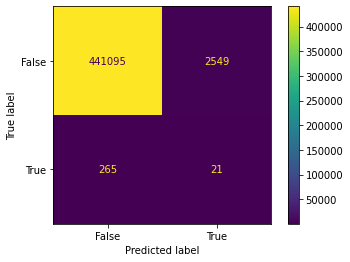

Accuracy when threshould =  0.99 0.993661


In [11]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

y_predict_class = [1 if p > bestThreshold else 0 for p in y_pred]
confusion_matrix = metrics.confusion_matrix(y_test, y_predict_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 


print("Accuracy when threshould = ",bestThreshold, round(accuracy_score(y_test, y_predict_class), 6))